In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import cv2

class ImageSeg:
     #Initializing the path of image and threshold value by taking as class parameters
    def __init__(self,path,threshold):
        self.path = path
        self.img = plt.imread(path)
        self.threshold = threshold
    #Visualize the raw rgb image
    def visualize_rgb(self):
        rgb_img = self.img
        plt.imshow(rgb_img)

    #Nullify the R and B values in the image matrix
    def RGNull(self):
        arr = np.array(self.img)
        for i in range(len(arr)):
            for j in range(len(arr[i])):
                arr[i][j][0]=0
                arr[i][j][2]=0
        return arr

    #Grayscale the image
    def IsoGray(self):
        RGNull_img = self.RGNull()
        gray_img = cv2.cvtColor(RGNull_img,cv2.COLOR_BGR2GRAY)
        return gray_img

    #Apply Thresholding
    def IsoGrayThresh(self):

        gray_img = self.IsoGray()
        for i in range(len(gray_img)):
            for j in range(len(gray_img[i])):
                if gray_img[i][j]>self.threshold:
                    gray_img[i][j]=255
                else:
                    gray_img[i][j]=0

        plt.imshow(gray_img)
        return gray_img

    #Comparison b/w raw rgb, grayscaled and thresholded images
    def visualize_compare(self):
        fig = plt.figure(figsize=(14, 30))
        row = 1
        cols = 3
        fig.add_subplot(row,cols,1)
        io.imshow(self.img)
        fig.add_subplot(row,cols,2)
        io.imshow(self.IsoGray())
        fig.add_subplot(row,cols,3)
        io.imshow(self.IsoGrayThresh())

    #Function to count the tree pixels in the thresholded image
    def PixelCount(self):
        count = 0
        arr = self.IsoGrayThresh()
        for i in arr:
            for j in i:
                if j!=0:
                    count+=1

        return count

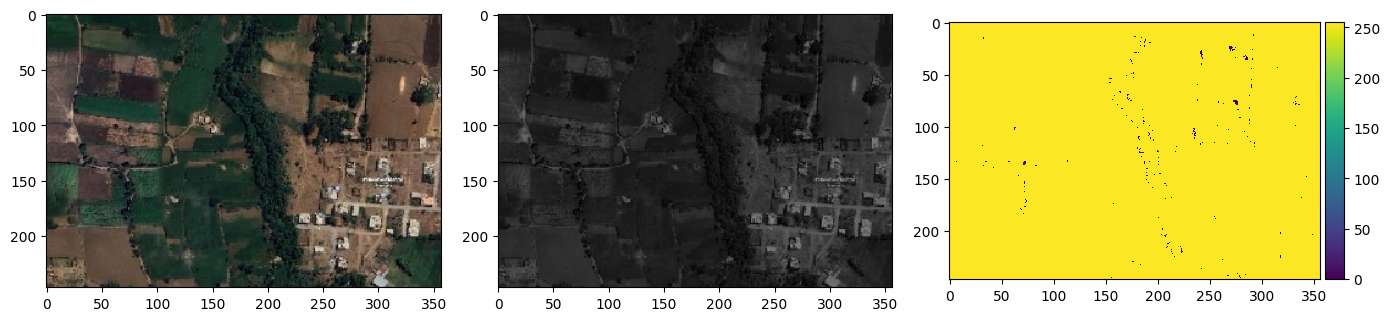

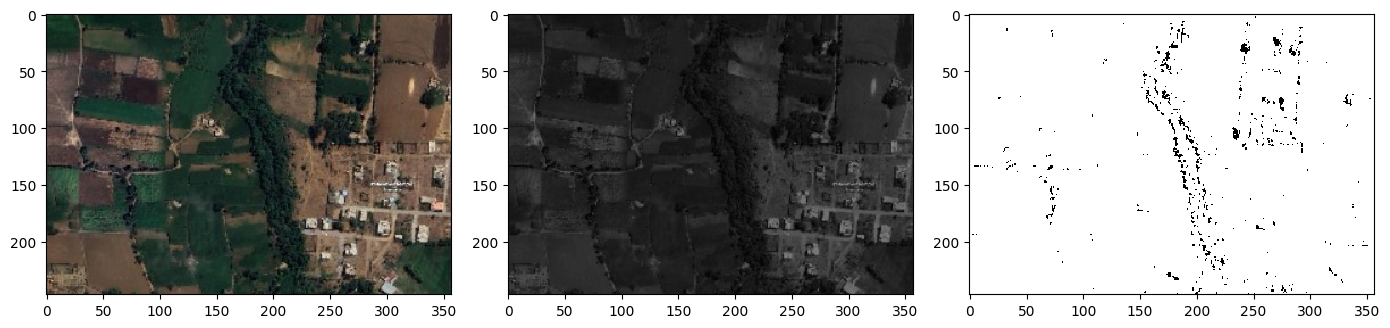

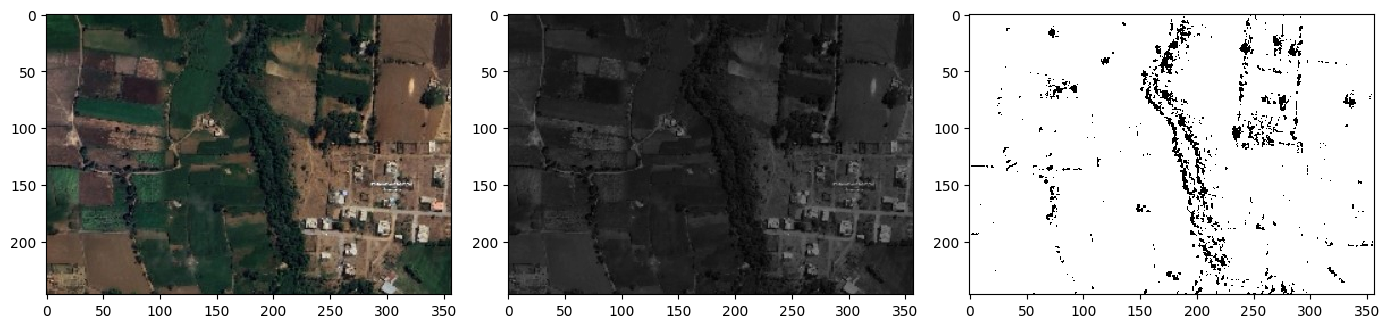

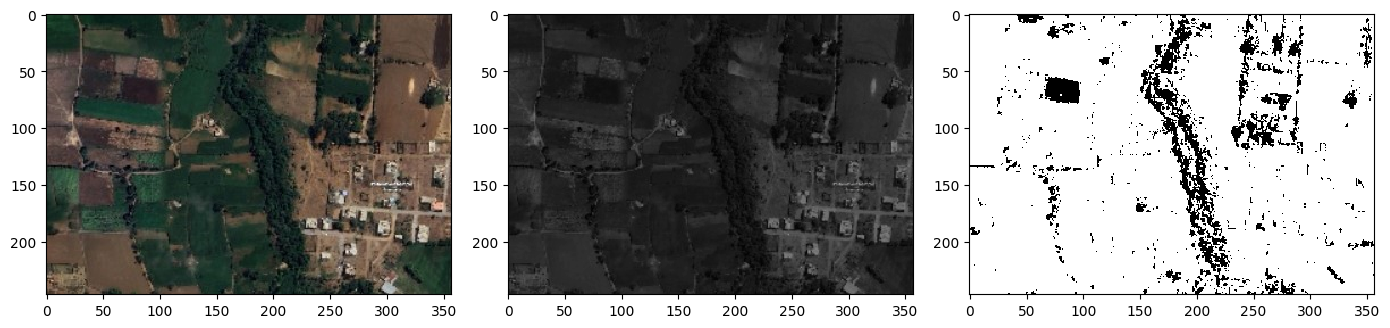

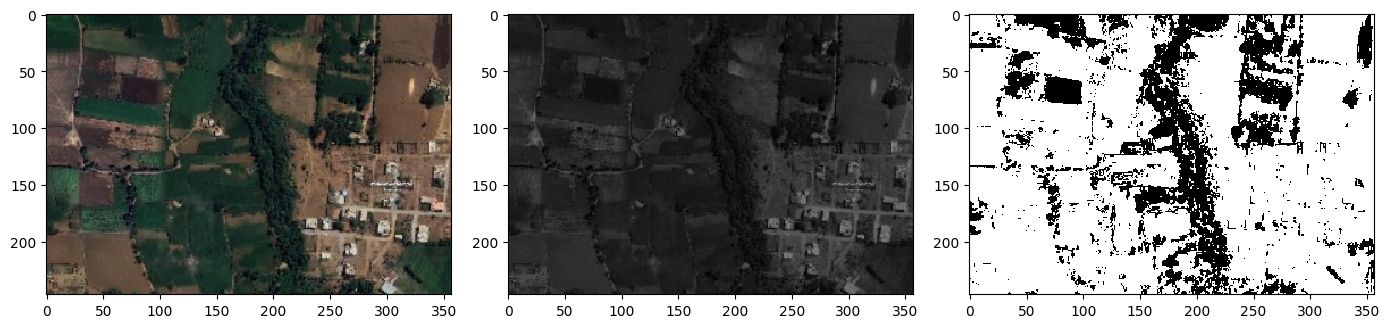

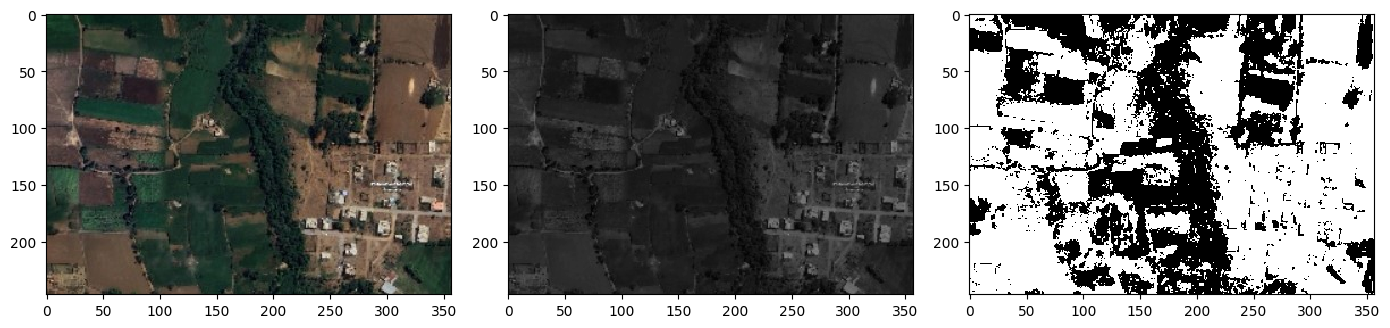

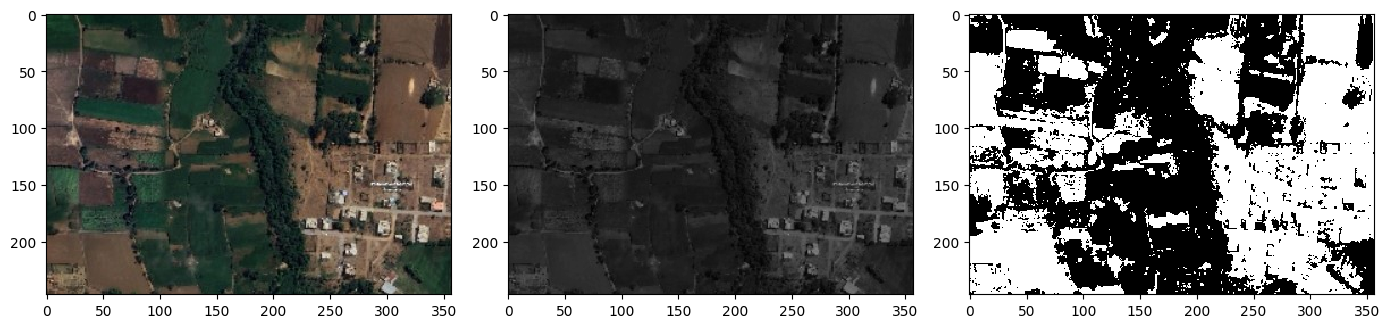

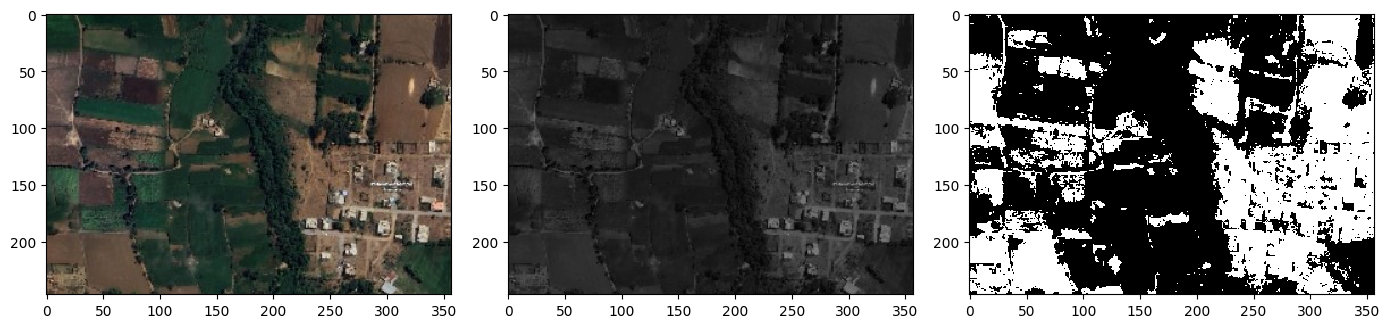

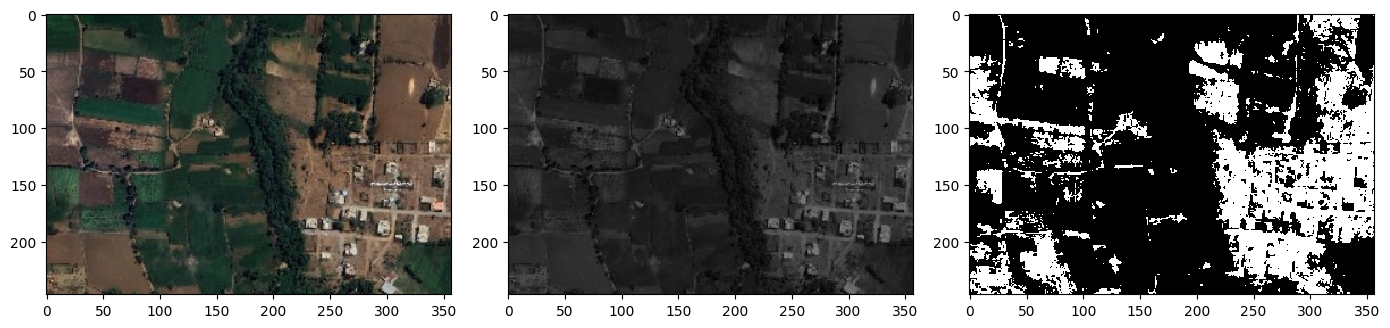

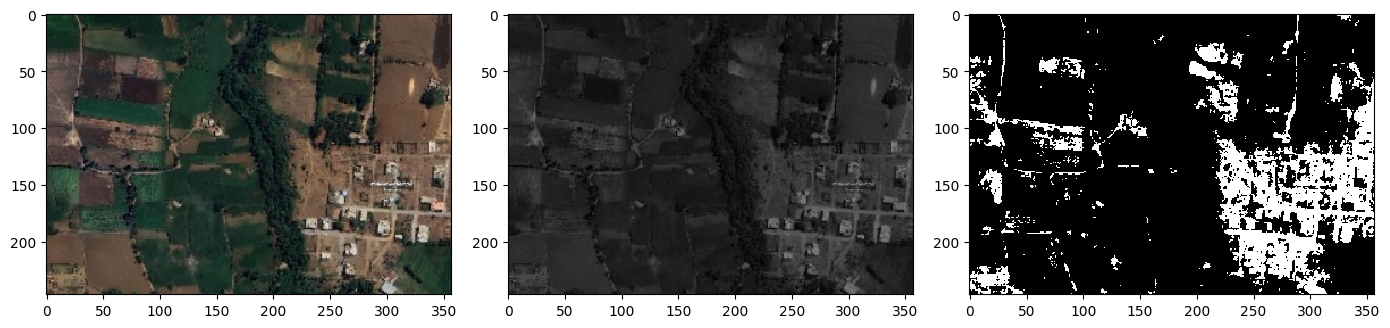

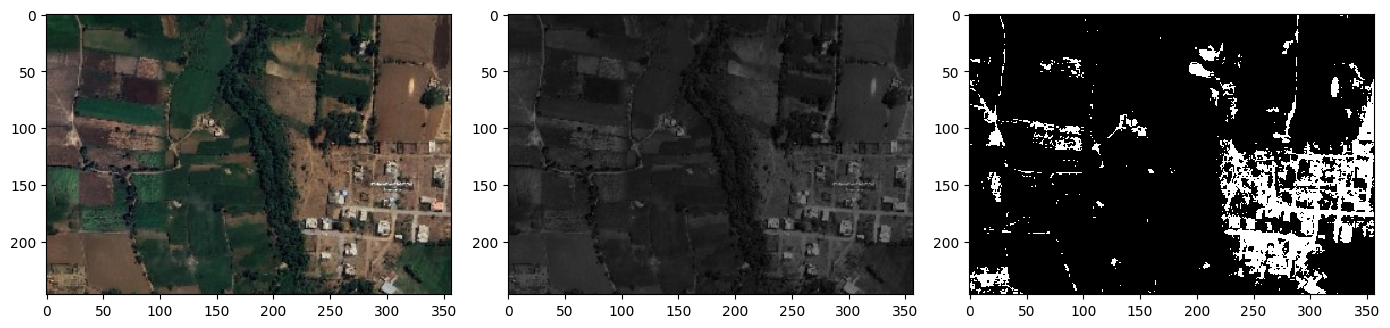

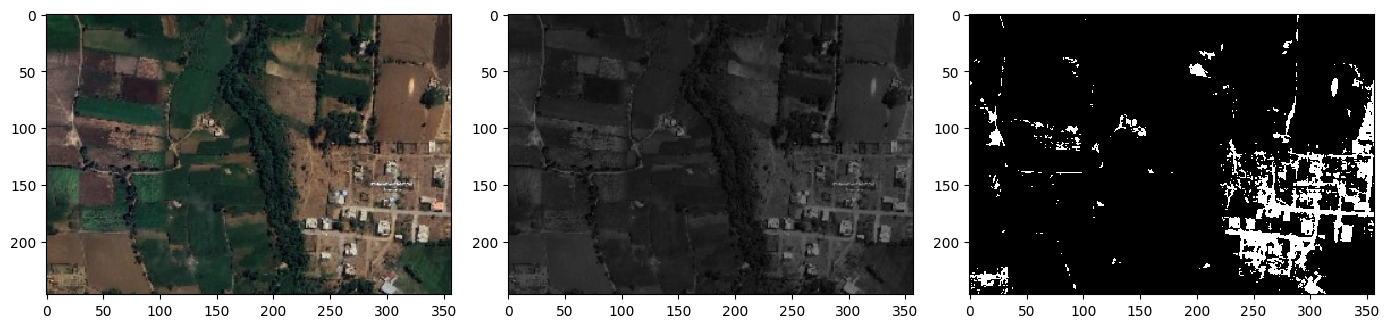

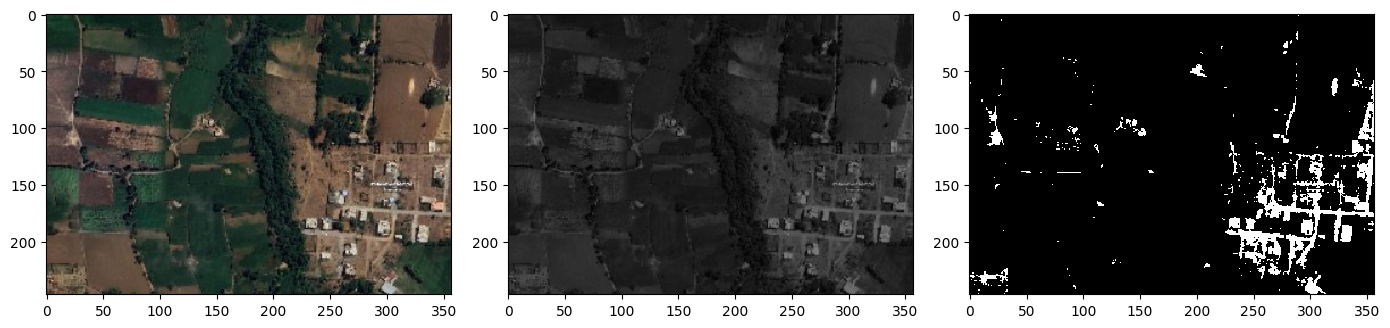

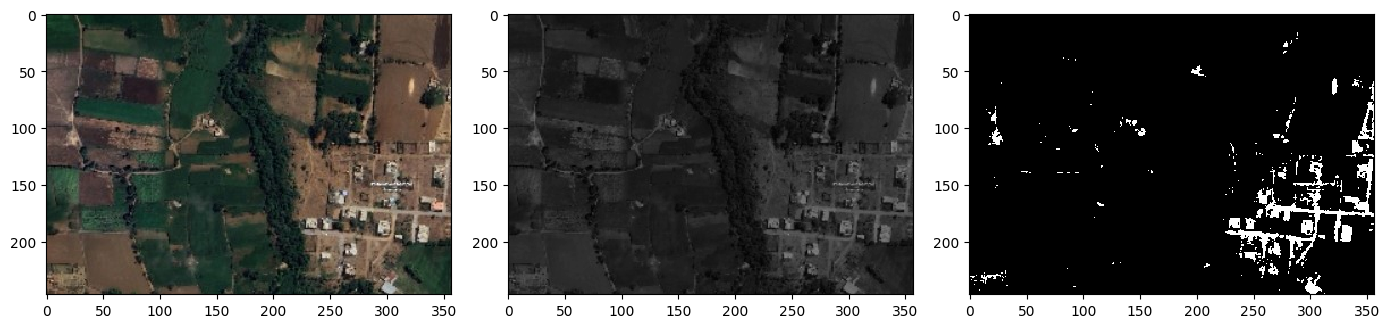

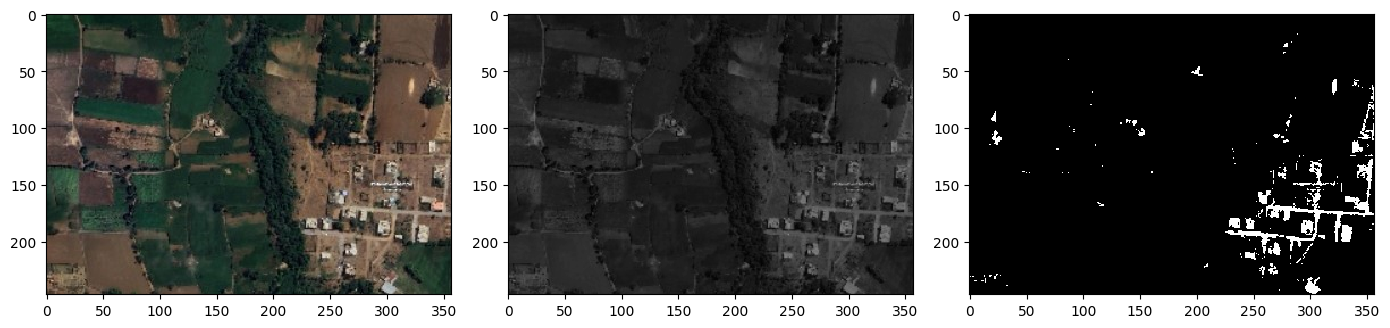

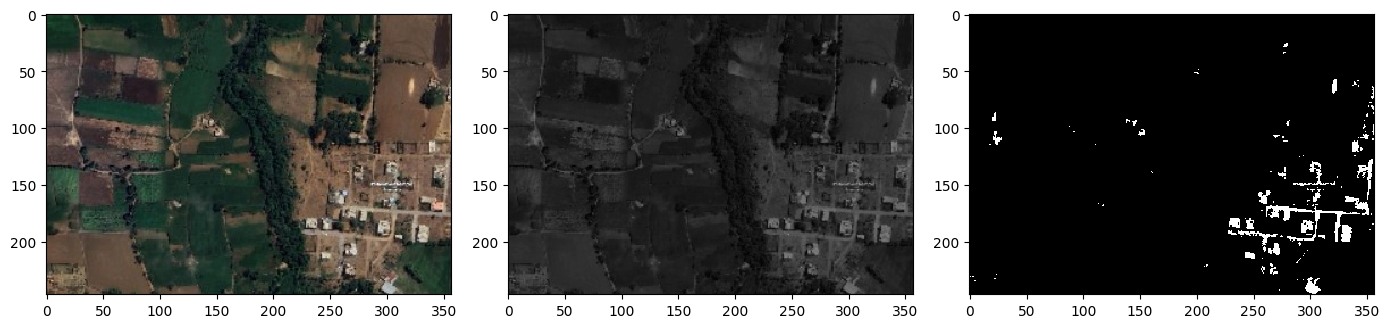

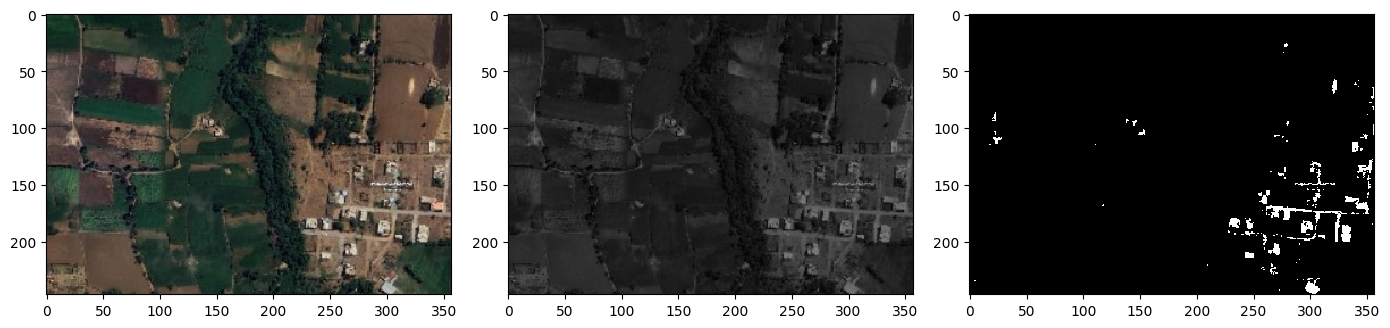

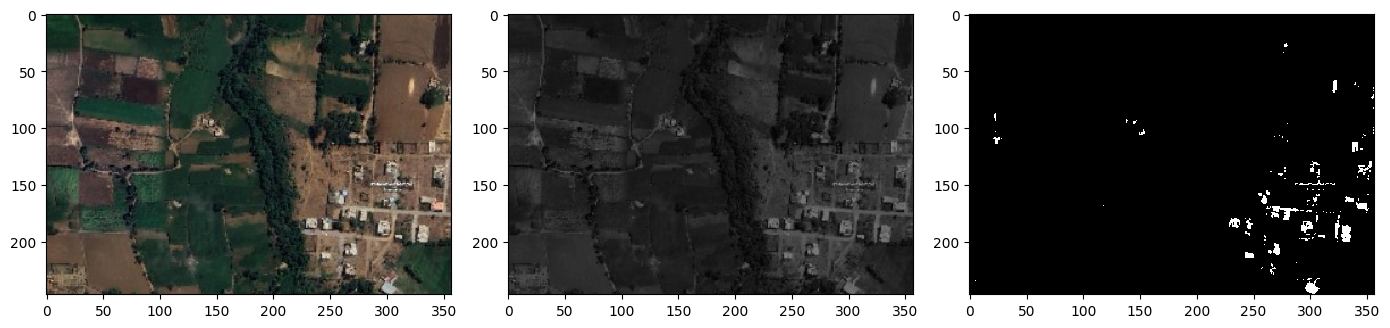

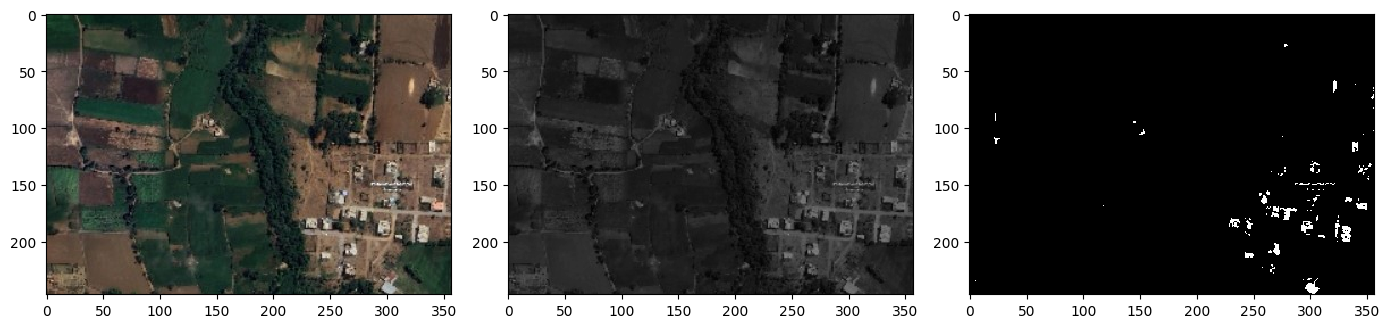

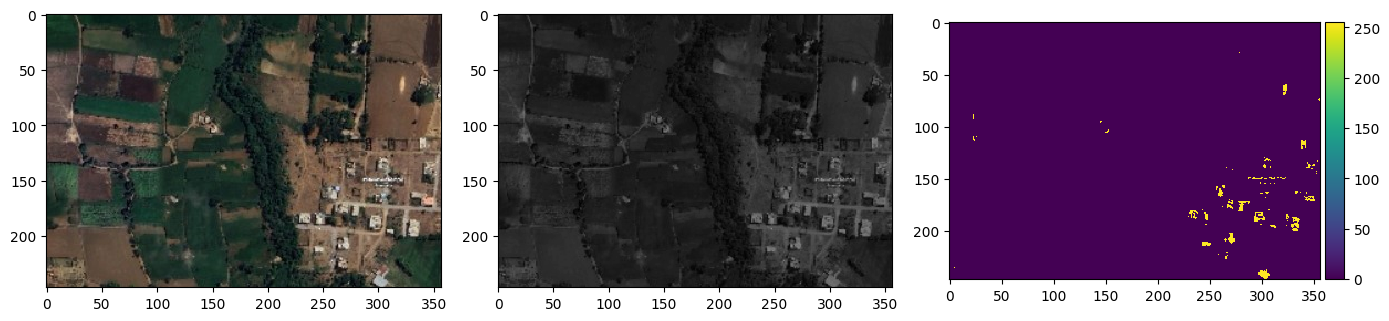

In [7]:
thresh = 0
while thresh<100:
    thresh+=5
    obj = ImageSeg(r"google_earth.jpg",thresh)
    obj.visualize_compare()


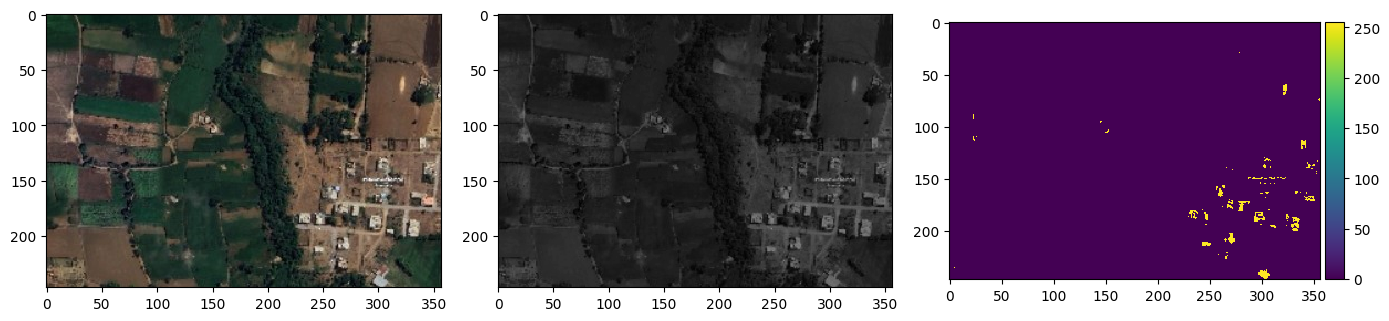

In [8]:
obj.visualize_compare()

Tree Pixels -> 697 pixels


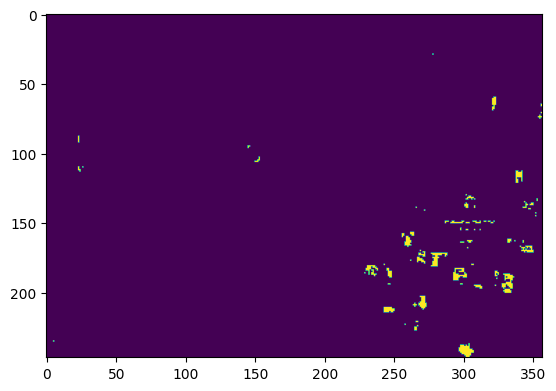

In [9]:
print(f"Tree Pixels -> {obj.PixelCount()} pixels")